# Temperature and Rainfall Analysis using PyCaret - Regression

### Step 1: Merging the dataset

In [4]:
import pandas as pd

temperature_df = pd.read_excel('dataset/Temp_SRS_1Jan1964_to_31Oct2020.xlsx')
rainfall_df = pd.read_csv('dataset/Rainfall_at_SRS_30Nov1960_to_18Nov2020.csv')

rainfall_df = rainfall_df.fillna(0)

temperature_df['DATE'] = pd.to_datetime(temperature_df['DATE'], format='%Y-%m-%d')
rainfall_df['DATE'] = pd.to_datetime(rainfall_df['DATE'], format='%m/%d/%Y')

temperature_df['YEAR'] = pd.to_datetime(temperature_df.DATE).dt.year
rainfall_df['YEAR'] = pd.to_datetime(rainfall_df.DATE).dt.year

temperature_df_grouped = temperature_df.groupby('YEAR').agg({'LOW TEMP': 'mean', 'HIGH TEMP': 'mean'})
temperature_df_grouped['RAINFALL'] = rainfall_df.groupby('YEAR').agg({'200-F Rainfall (inches/day)': 'mean'})
rain_temp_df = pd.merge(temperature_df, rainfall_df, on='DATE')

temperature_df_grouped.head()
# print(rain_temp_df.head(10))

,LOW TEMP,HIGH TEMP,RAINFALL
YEAR,,,
1964,52.980822,74.909589,0.196011
1965,52.030137,74.164384,0.123014
1966,51.624658,73.520548,0.131699
1967,52.408219,75.449315,0.116438
1968,53.278689,75.653005,0.094740


## Predicting rainfall using average yearly maximum and minimum temperatures

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:33:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

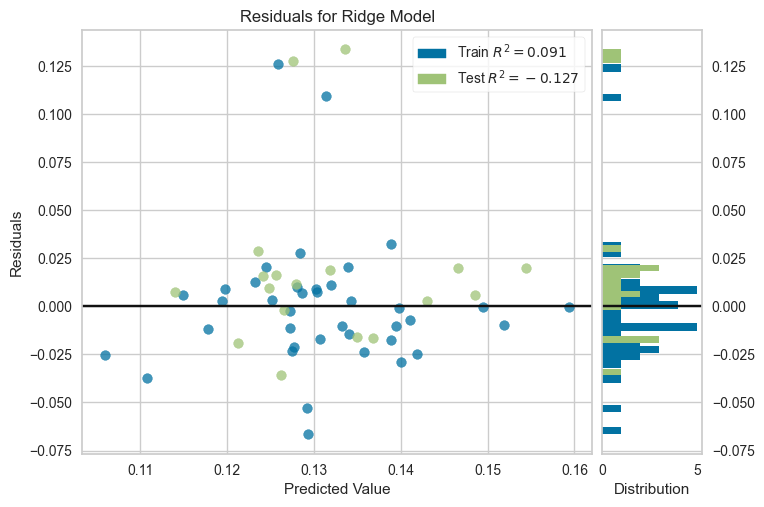

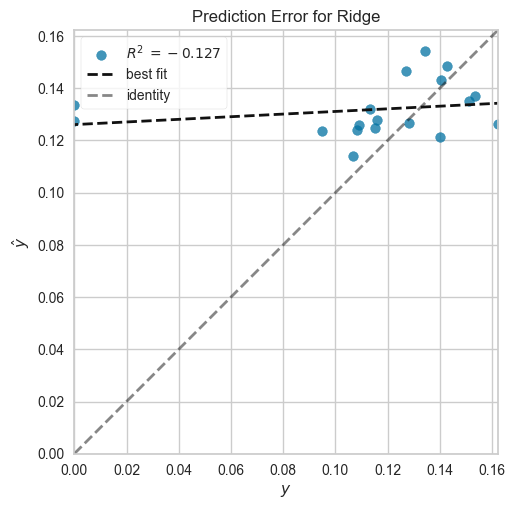

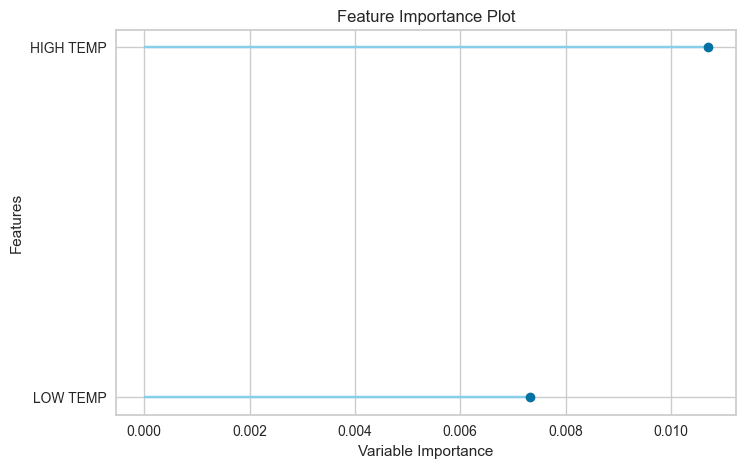

,LOW TEMP,HIGH TEMP
YEAR,,
1964,52.980822,74.909589
1965,52.030137,74.164384
1966,51.624658,73.520548
1967,52.408219,75.449315
1968,53.278689,75.653005


In [5]:
from pycaret.regression import *

s = setup(temperature_df_grouped, target='RAINFALL')
best = compare_models()

plot_model(best, plot='residuals')
plot_model(best, plot='error')
plot_model(best, plot='feature')

new_data = temperature_df_grouped.copy()
new_data.drop('RAINFALL', axis=1, inplace=True)
new_data.head()


In [6]:
predictions = predict_model(best, data=new_data)
predictions.tail()

,LOW TEMP,HIGH TEMP,prediction_label
YEAR,,,
2016,56.986340,77.819672,0.127558
2017,57.109589,77.547943,0.131369
2018,55.917809,75.975342,0.139473
2019,56.747944,77.684929,0.127255
2020,59.570492,78.718033,0.136867


In [7]:
temperature_df_grouped.tail()

,LOW TEMP,HIGH TEMP,RAINFALL
YEAR,,,
2016,56.986339,77.819672,0.000000
2017,57.109589,77.547945,0.021973
2018,55.917808,75.975342,0.149699
2019,56.747945,77.684932,0.138438
2020,59.570492,78.718033,0.153447


### Step 2: Using PyCaret for exploration

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:33:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

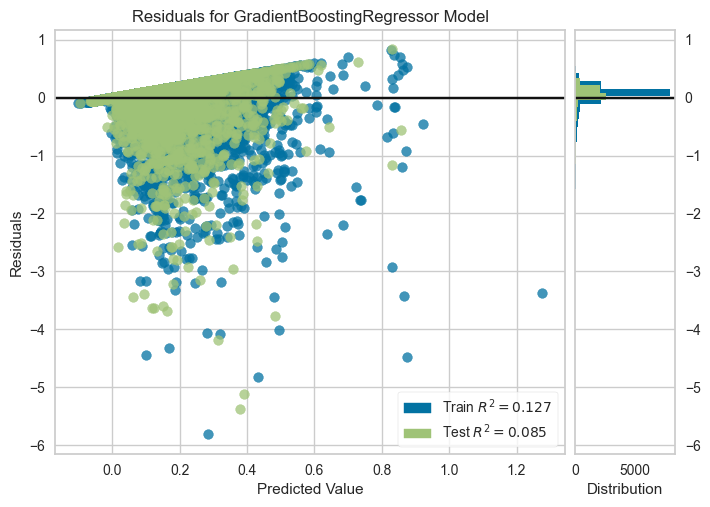

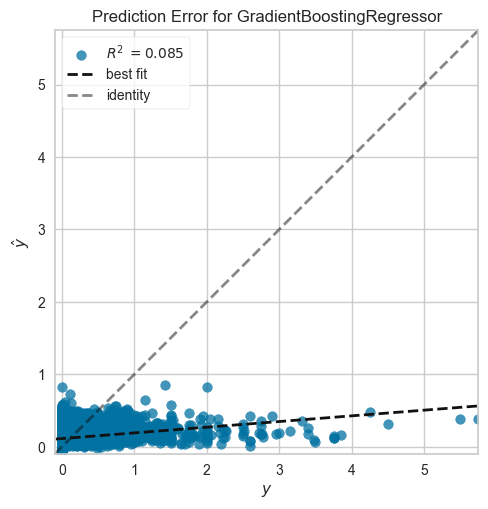

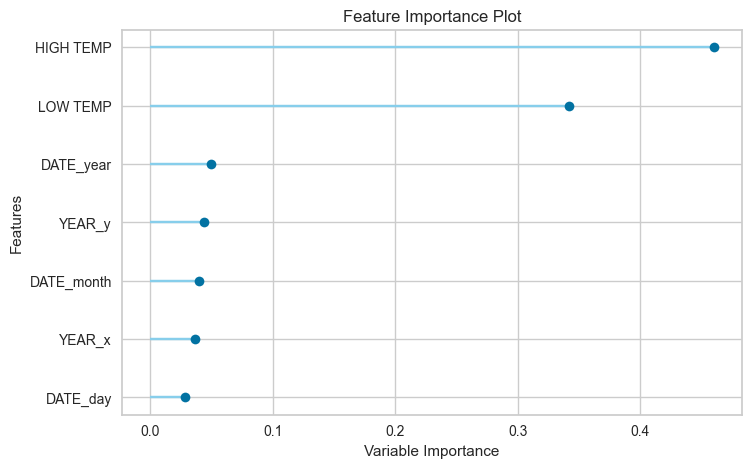

,DATE,LOW TEMP,HIGH TEMP,YEAR_x,YEAR_y,200-F Rainfall (inches/day),prediction_label
7262,1983-11-21,43,73,1983,1983,0.0,0.013136
12670,1998-09-11,60,85,1998,1998,0.0,0.007810
14295,2003-02-23,40,62,2003,2003,1.1,0.142278
13123,1999-12-09,42,70,1999,1999,0.0,0.044900
19120,2016-05-10,66,79,2016,2016,0.0,0.092681


In [8]:
from pycaret.regression import *

s = setup(rain_temp_df, target='200-F Rainfall (inches/day)')
best = compare_models()
# results = pull()
# print(results)

plot_model(best, plot='residuals')
plot_model(best, plot='error')
plot_model(best, plot='feature')

pred = predict_model(best)

pred.head()

In [9]:
pred = predict_model(best)

pred.head()

,DATE,LOW TEMP,HIGH TEMP,YEAR_x,YEAR_y,200-F Rainfall (inches/day),prediction_label
7262,1983-11-21,43,73,1983,1983,0.0,0.013136
12670,1998-09-11,60,85,1998,1998,0.0,0.007810
14295,2003-02-23,40,62,2003,2003,1.1,0.142278
13123,1999-12-09,42,70,1999,1999,0.0,0.044900
19120,2016-05-10,66,79,2016,2016,0.0,0.092681


In [10]:
new_data = rain_temp_df.copy()
new_data.drop('200-F Rainfall (inches/day)', axis=1, inplace=True)
new_data.head()

,DATE,LOW TEMP,HIGH TEMP,YEAR_x,YEAR_y
0,1964-01-01,30,36,1964,1964
1,1964-01-02,25,50,1964,1964
2,1964-01-03,32,64,1964,1964
3,1964-01-04,43,59,1964,1964
4,1964-01-05,39,61,1964,1964


In [11]:
predictions = predict_model(best, data=new_data)
predictions.head(20)

,DATE,LOW TEMP,HIGH TEMP,YEAR_x,YEAR_y,prediction_label
0,1964-01-01,30,36,1964,1964,0.202687
1,1964-01-02,25,50,1964,1964,0.040251
2,1964-01-03,32,64,1964,1964,0.079277
3,1964-01-04,43,59,1964,1964,0.221677
4,1964-01-05,39,61,1964,1964,0.145862
5,1964-01-06,50,65,1964,1964,0.321928
6,1964-01-07,53,66,1964,1964,0.291082
7,1964-01-08,42,53,1964,1964,0.322711
8,1964-01-09,42,56,1964,1964,0.299399
9,1964-01-10,29,42,1964,1964,0.145404


In [12]:
rain_temp_df.head(20)

,DATE,LOW TEMP,HIGH TEMP,YEAR_x,200-F Rainfall (inches/day),YEAR_y
0,1964-01-01,30,36,1964,0.01,1964
1,1964-01-02,25,50,1964,0.00,1964
2,1964-01-03,32,64,1964,0.00,1964
3,1964-01-04,43,59,1964,0.00,1964
4,1964-01-05,39,61,1964,0.00,1964
5,1964-01-06,50,65,1964,0.10,1964
6,1964-01-07,53,66,1964,0.20,1964
7,1964-01-08,42,53,1964,2.01,1964
8,1964-01-09,42,56,1964,0.60,1964
9,1964-01-10,29,42,1964,0.00,1964
